In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
# Define all symbols
N = sm.symbols('N')
rho = sm.symbols('rho')
vbar = sm.symbols('vbar')
tauv = sm.symbols('tauv')
taue = sm.symbols('taue')
tauz = sm.symbols('tauz')
S = sm.symbols('S')
x = sm.symbols('x')

In [4]:
def find_root(x0,f,fp,fpp=None,method='newton',max_iter=1000,tol=1e-8,full_info=False):
    """ find root
        
    Args:
    
        x0 (float): initial value
        f (callable): function
        fp (callable): derivative
        fp (callable): second derivative
        method (str): newton or halley
        max_iter (int): maximum number of iterations
        tol (float): tolerance
        full_info (bool): controls information returned
        
    Returns:
    
        x (float/ndarray): root (if full_info, all x tried)
        i (int): number of iterations used
        fx (ndarray): function values used (if full_info) 
        fpx (ndarray): derivative values used (if full_info)
        fppx (ndarray): second derivative values used (if full_info)
        
    """
    
    # initialize
    x = np.zeros(max_iter)
    fx = np.zeros(max_iter)
    fpx = np.zeros(max_iter)
    fppx = np.zeros(max_iter)
    x[0] = x0
    i = 0
    
    # iterate
    while True:
        
        # step 2: evaluate function and derivatives
        fx[i] = f(x[i])
        fpx[i] = fp(x[i])
        if method == 'halley':
            fppx[i] = fpp(x[i])
        
        # step 3: check convergence
        if abs(fx[i]) < tol or i >= max_iter:
            break
            
        # step 4: update x
        if method == 'newton':
            x[i+1] = x[i] - fx[i]/fpx[i]
        elif method == 'halley':
            a = fx[i]/fpx[i]
            b = a*fppx[i]/(2*fpx[i])
            x[i+1] = x[i] - a/(1-b)
        
        # step 5: increment counter
        i += 1
        
    # return
    if full_info:
        return x,i,fx,fpx,fppx
    else:
        return x[i],i

In [5]:
def plot_find_root(x0,f,fp,fpp=None,method='newton',xmin=-2,xmax=2,xn=100):
    
    # a. find root and return all information 
    x,max_iter,fx,fpx,fppx = find_root(x0,f,fp,fpp=fpp,method=method,full_info=True)
    
    # b. compute function on grid
    xvec = np.linspace(xmin,xmax,xn)
    fxvec = f(xvec)
    
    # c. figure
    def _figure(i):
        
        # i. approximation
        if method == 'newton':
            fapprox = fx[i] + fpx[i]*(xvec-x[i])
        elif method == 'halley':
            fapprox = fx[i] + fpx[i]*(xvec-x[i]) + fppx[i]*(xvec-x[i])**2  
            
        # ii. figure
        fig = plt.figure(dpi=100)
        ax = fig.add_subplot(1,1,1)
        
        ax.plot(xvec,fxvec,label='function') # on grid
        ax.plot(x[i],fx[i],'o',color='black',label='current') # now
        
        if i < max_iter:            
            ax.plot(xvec,fapprox,label='approximation') # approximation
            ax.axvline(x[i+1],ls='--',lw=1,color='black') # cross zero
            ax.plot(x[i+1],fx[i+1],'o',color='black',mfc='none',label='next')# next
            
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_ylim([fxvec[0],fxvec[-1]])
    
    widgets.interact(_figure,
        i=widgets.IntSlider(description="iterations", min=0, max=max_iter, step=1, value=0)
    );

In [6]:
f = lambda x: rho*taue**(-1)*x**3+N/(N-1)*x**2+rho*tauz**(-1)/(N-1)*x-((N-2)*taue*tauz**(-1))/((N-1)**2)
fp = lambda x: 2*rho*taue**(-1)*x**2+N/(N-1)*x+rho*tauz**(-1)/(N-1)
fpp = lambda x: 6*rho*taue**(-1)*x+N/(N-1)

In [101]:
x,i = find_root(-5,f,fp,method='newton')
print(i,x,f(x))

15 -0.1373611328262343 -4.715454822185744e-09


In [102]:
x,i = find_root(-5,f,fp,fpp,method='halley')
print(i,x,f(x))

488 0.03250610600376851 -7.036919350174309e-09


In [9]:
phi = ((N-1)*x**2)/((N-1)*x**2+taue*tauz**(-1))

print(phi)

0.34461704877838173


In [10]:
gamma = x*(1+tauv*taue**(-1)/(1+(N-1)*phi))

mu = (gamma-x)*vbar+phi/(1+(N-1)*phi)

In [11]:
expected_p = vbar-(1-phi)/(N*gamma*(1+(N-1)*phi))

In [12]:
print(expected_p)

0.933146456439869


In [13]:
np.random.seed(1996)
for _ in range(10):
    print(np.random.normal(size=5))

[-0.57285766  0.15460676  1.88962132 -0.61375061 -0.19281915]
[-0.48191554  1.33225346  0.17746124 -0.36277234  0.33420864]
[ 0.74458813 -0.9754828  -1.06964988 -0.8059237  -0.72620128]
[-0.26237527 -0.98095578  0.31110254 -2.44698541 -0.37365272]
[ 0.5822131   1.21328091 -1.08359425 -0.16391252 -0.77992027]
[ 0.84572437 -0.25805504  1.66139132 -1.03819056 -1.8805486 ]
[-0.22364569 -1.45709381 -0.20397665  0.11641236  2.10808609]
[ 0.28761288 -0.04033583  1.5795458  -1.13171    -1.98449953]
[ 1.1877004   0.1200026  -0.37438387 -1.17498088  0.08812497]
[ 0.54201764  0.27595909 -0.9043619  -1.01938928 -0.62069439]


In [93]:
def simulate_expected_p(tauz,taue,tauv,rho,vbar,N):
    f = lambda x: rho*taue**(-1)*x**3+N/(N-1)*x**2+rho*tauz**(-1)/(N-1)*x-((N-2)*taue*tauz**(-1))/((N-1)**2)
    fp = lambda x: 2*rho*taue**(-1)*x**2+N/(N-1)*x+rho*tauz**(-1)/(N-1)
    fpp = lambda x: 6*rho*taue**(-1)*x+N/(N-1)
    
# x,i = find_root(-5,f,fp,fpp,method='halley')
    x,i = find_root(-5,f,fp,fpp,method='newton')
   
    phi = ((N-1)*x**2)/((N-1)*x**2+taue*tauz**(-1))
    gamma = x*(1+tauv*taue**(-1)/(1+(N-1)*phi))
    
    expected_p = vbar-(1-phi)/(N*gamma*(1+(N-1)*phi))
        
    return expected_p

In [94]:
expected_p_list = []
for N in range(7,50):
    expected_p_list.append(simulate_expected_p(tauz,taue,tauv,rho,vbar,N))
print(expected_p_list)

[0.395258674025628, 0.5231549566509033, 0.6134194700748861, 0.6796872216925881, 0.7298624852759854, 0.7688162407355085, 0.7996954365972444, 0.8246064472505937, 0.845008704791858, 0.8619401879792398, 0.876152717861291, 0.8882048843025689, 0.8985191165680196, 0.9074176432892418, 0.9151514616319281, 0.9219184843084098, 0.9278740725931013, 0.9331459578610027, 0.9378360282505352, 0.9420286719114582, 0.9457919326783959, 0.9491835003460157, 0.9522522384006388, 0.9550381525056313, 0.9575756635188839, 0.9598938659740973, 1.0016262514168346, 1.0013084343042948, 1.001102420569103, 1.000949905077947, 1.0008303458854892, 1.000733450237346, 1.0006531524087527, 1.0005855194214102, 1.0005278298570737, 1.0004781230647142, 1.000434930355825, 1.0003971308531865, 1.000363844393682, 1.0003343721766234, 1.000308149868454, 1.0002847185198993, 1.00026369759772]


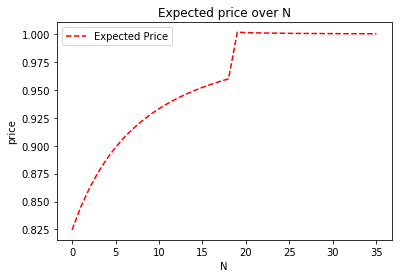

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(expected_p_list[7:50],'r--',label="Expected Price")
plt.legend()
plt.title("Expected price over N")
plt.xlabel('N')
plt.ylabel('price')
plt.show()

In [96]:
def interactive_figure(tauz,taue,tauv,rho,vbar,N):
    
    # a. calculations
    expected_p_list = []
    for N in range(3,50):
        expected_p_list.append(simulate_expected_p(tauz,taue,tauv,rho,vbar,N))
    
    # b. figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(expected_p_list[3:50],'r--',label="Expected Price")
    plt.legend()
    plt.title("Expected price over N")
    plt.xlabel('N')
    plt.ylabel('price')
    plt.show()
    

In [100]:
widgets.interact(interactive_figure,
    N=widgets.fixed(N),
    tauz=widgets.fixed(tauz),
    vbar=widgets.fixed(vbar),
    rho=widgets.FloatSlider(description="$Risk aversion$", min=30, max=100, step=2, value=1),
    taue=widgets.FloatSlider(description="$Variance of signal$", min=8, max=25, step=1, value=1),
    tauv=widgets.FloatSlider(description="$Variance of value$", min=5, max=100, step=1, value=1),
);

interactive(children=(FloatSlider(value=8.0, description='$Variance of signal$', max=25.0, min=8.0, step=1.0),…